# Group Member: Jilong Lyu, Daoyu Li, Xueyi Wan, Yue Liu
# TASK 1

In [111]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np
import math
import matplotlib.pyplot as plt
from functools import reduce
import operator

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        # write your code here.
        return np.random.uniform(mu-sigma/math.sqrt(3), mu+sigma/math.sqrt(3), n)
        pass
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")

In [112]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [113]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = [0]
    of = [0]
    for k in range(1,n+1):
        obj_value = 0
        step_length = 1/(k-1+1)
        x.append(x[k-1] - step_length*(x[k-1]-y[ordering[k-1]]))
        for i in range(0,n):
            obj_value = obj_value + (x[k-1]-y[i])**2
        of.append(1/2*obj_value)
    return x,of[1:]


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = [0]
    of = [0]
    for k in range(1,n+1):
        obj_value = 0
        step_length = 1/(k-1+1)
        x.append(x[k-1] - step_length*(x[k-1]-y[ordering[k-1]]))
        for i in range(0,n):
            obj_value = obj_value + (x[k-1]-y[i])**2
        of.append(1/2*obj_value)
    return x,of[1:]


Text(0.5, 1.0, 'obj_uniform')

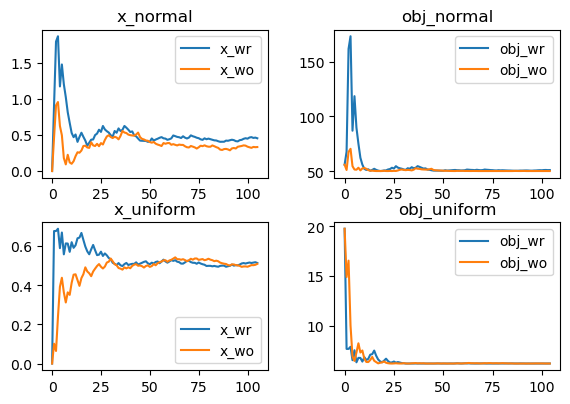

In [114]:
x_wr1, obj_wr1 = IGD_wr_task1(y1)
x_wr2, obj_wr2 = IGD_wr_task1(y2)
x_wo1, obj_wo1 = IGD_wo_task1(y1)
x_wo2, obj_wo2 = IGD_wo_task1(y2)
fig, ax = plt.subplots(2,2,dpi = 100)
fig.tight_layout()
ax[0,0].plot(x_wr1, label="x_wr")
ax[0,0].plot(x_wo1, label="x_wo")
ax[0,0].legend()
ax[0,0].set_title("x_normal")

ax[1,0].plot(x_wr2, label="x_wr")
ax[1,0].plot(x_wo2, label="x_wo")
ax[1,0].legend()
ax[1,0].set_title("x_uniform")

ax[0,1].plot(obj_wr1, label="obj_wr")
ax[0,1].plot(obj_wo1, label="obj_wo")
ax[0,1].legend()
ax[0,1].set_title("obj_normal")

ax[1,1].plot(obj_wr2, label="obj_wr")
ax[1,1].plot(obj_wo2, label="obj_wo")
ax[1,1].legend()
ax[1,1].set_title("obj_uniform")


#### According to the graph above, we can conclude that IGD_wr_task1 is better from the results.

In [115]:
print([np.mean(y1), x_wr1[-1], x_wo1[-1]])
print([np.mean(y2), x_wr2[-1], x_wo2[-1]])

[0.33159232166837055, 0.45289137691778925, 0.3315923216683706]
[0.5091005863686983, 0.5136939365536894, 0.5091005863686979]


From the data above, since the IGD_wo_task1 has the closer anwser to the mean, then the IGD_wo_task1 must converge to the true solution (mean value of y).
##### Proof: 
If we initialize in the method with $x_0=0$ and take n steps of incremental gradient with stepsize $\gamma_k=\frac{1}{k}$, we have $x_n=\frac{1}{n}\Sigma_{{j=1}}^{n}yi_j$, where $i_j$ is the index drawn at iteration j. If the step are chosen using a without-replacement sampling scheme, $x_n=\mu_y$, the global minimum. On the other hand, using with-replacement sampling, we will have $E|(x_n-\mu_y)^2|=\frac{\sigma^2}{n}$, which is a positive mean square error.\
By the arithmetic-geometric mean inequality, we then have that the without-replacement sample is always closer to the optimal value in expectation. 
Thus, the IGD_wo_task1 has the closer answer to the mean.






# TASK 2

In [116]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(y):
    # n = len(y)
    n = np.random.randint(low=5, high=30)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = [0]
    of = [0]
    beta = np.random.uniform(low=1, high=2, size = n)
    step_length = 0.95*min(beta**(-1))
    for k in range(1,n+1):
        obj_value = 0
        x.append(x[k-1]-step_length*beta[ordering[k-1]]*(x[k-1]-y))
        for i in range(0,n):
            obj_value = obj_value + beta[i]*(x[k-1]-y)**2
        of.append(1/2*obj_value)
    return x,of[1:]


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(y):
    # n = len(y)
    n = np.random.randint(low=5, high=30)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = [0]
    of = [0]
    beta = np.random.uniform(low=1, high=2, size = n)
    step_length = 0.95*min(beta**(-1))
    for k in range(1,n+1):
        obj_value = 0
        x.append(x[k-1]-step_length*beta[ordering[k-1]]*(x[k-1]-y))
        for i in range(0,n):
            obj_value = obj_value + beta[i]*(x[k-1]-y)**2
        of.append(1/2*obj_value)
    return x,of[1:]


Text(0.5, 1.0, 'obj_uniform')

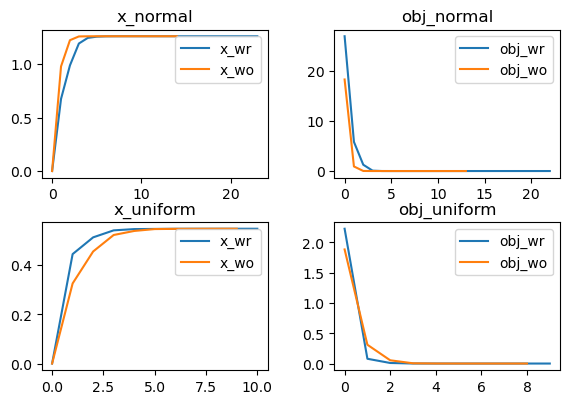

In [117]:
y3 = generate_random_numbers(1, 0.5, 1.0, "normal")
y4 = generate_random_numbers(1, 0.5, 1.0, "uniform")
x_wr3, obj_wr3 = IGD_wr_task2(y3)
x_wr4, obj_wr4 = IGD_wr_task2(y4)
x_wo3, obj_wo3 = IGD_wo_task2(y3)
x_wo4, obj_wo4 = IGD_wo_task2(y4)
fig, ax = plt.subplots(2,2,dpi = 100)
fig.tight_layout()
ax[0,0].plot(x_wr3, label="x_wr")
ax[0,0].plot(x_wo3, label="x_wo")
ax[0,0].legend()
ax[0,0].set_title("x_normal")

ax[1,0].plot(x_wr4, label="x_wr")
ax[1,0].plot(x_wo4, label="x_wo")
ax[1,0].legend()
ax[1,0].set_title("x_uniform")

ax[0,1].plot(obj_wr3, label="obj_wr")
ax[0,1].plot(obj_wo3, label="obj_wo")
ax[0,1].legend()
ax[0,1].set_title("obj_normal")

ax[1,1].plot(obj_wr4, label="obj_wr")
ax[1,1].plot(obj_wo4, label="obj_wo")
ax[1,1].legend()
ax[1,1].set_title("obj_uniform")

#### According to the graph above, we can conclude that IGD_wr_task2 is better from the results.

# TASK 3

In [118]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [119]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [120]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = [0]
    step_length = 1e-3
    n = len(y)
    for i in range(50):
        ordering = np.random.choice(n,n, replace=True)
        for k in range(0,n):
            x.append(x[-1]-step_length*A[ordering[k]]*(A[ordering[k]].dot(x[-1])-y[ordering[k]]))
    of = [0]
    for k in range(1,10000):
        obj_value = 0
        for i in range(0,200):
            obj_value = obj_value+(A[i].dot(x[k])-y[i])
        of.append(obj_value)
    return x,of
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = [0]
    step_length = 1e-3
    n = len(y)
    for i in range(50):
        ordering = np.random.choice(n,n, replace=False)
        for k in range(0,n):
            x.append(x[-1]-step_length*A[ordering[k]]*(A[ordering[k]].dot(x[-1])-y[ordering[k]]))
    of = [0]
    for k in range(1,10000):
        obj_value = 0
        for i in range(0,200):
            obj_value = obj_value+(A[i].dot(x[k])-y[i])
        of.append(obj_value)
    return x,of

Text(0.5, 1.0, 'obj function')

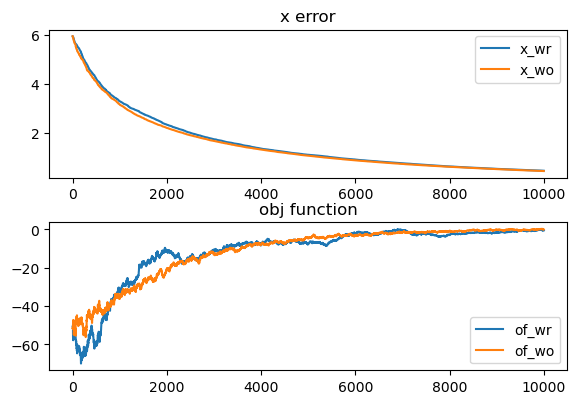

In [121]:
x_wr, of_wr = IGD_wr_task3(y,A)
x_wo, of_wo = IGD_wo_task3(y,A)
norm_wr = []
norm_wo = []
for i in range(10000):
    norm_wr.append(np.linalg.norm(x_wr[i]-xstar))
    norm_wo.append(np.linalg.norm(x_wo[i]-xstar))
fig, ax = plt.subplots(2,1,dpi = 100)
fig.tight_layout()
ax[0].plot(norm_wr, label="x_wr")
ax[0].plot(norm_wo, label="x_wo")
ax[0].legend()
ax[0].set_title("x error")

ax[1].plot(of_wr[1:], label="of_wr")
ax[1].plot(of_wo[1:], label="of_wo")
ax[1].legend()
ax[1].set_title("obj function")

#### According to the graph above, we can conclude that IGD_wr_task3 is better from the results.